In [3]:
# imports
import os
import requests
import json
import pandas as pd


# Foursquare

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [4]:
#set the parameters for the request: pastry shops and flower shops
fsq_api_key = os.environ["mehzabeen"]

fsq_url = "https://api.foursquare.com/v3/places/search"

fsq_headers = {
    "Accept": "application/json",
    "Authorization": fsq_api_key
}

fsq_params = {
    "categories": ('13047 , 17056'),
    "ll": '49.28,-123.12',
    "radius": 1000,
    "limit": 50,
}

response = requests.request("GET", fsq_url, params=fsq_params, headers=fsq_headers)

data = response.json()

print(data)

{'results': [{'fsq_id': '5686b3e3498ef47b320c52f8', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}, {'id': 13047, 'name': 'Pastry Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 721, 'geocodes': {'drop_off': {'latitude': 49.285188, 'longitude': -123.125728}, 'main': {'latitude': 49.285337, 'longitude': -123.125632}, 'roof': {'latitude': 49.285337, 'longitude': -123.125632}}, 'link': '/v3/places/5686b3e3498ef47b320c52f8', 'location': {'address': '1141 Robson St', 'country': 'CA', 'cross_street': 'btwn Thurlow & Bute', 'formatted_address': '1141 Robson St (btwn Thurlow & Bute), Vancouver BC V6E 1B5', 'locality': 'Vancouver', 'postcode': 'V6E 1B5', 'region': 'BC'}, 'name': 'Ladurée', 'rela

In [5]:
# Initialize an empty list to store the flattened results
flattened_results = []

# Flatten each result dictionary
for result in data['results']:
    flattened_result = {}
    for key, value in result.items():
        if key == 'geocodes':
            for k, v in value['main'].items():
                flattened_result[f"latitude"] = value['main']['latitude']
                flattened_result[f"longitude"] = value['main']['longitude']
        elif isinstance(value, list):
            for item in value:
                for k, v in item.items():
                    flattened_result[f"{key}.{k}"] = v
        elif isinstance(value, dict):
            for k, v in value.items():
                flattened_result[f"{key}.{k}"] = v
        else:
            flattened_result[key] = value
    flattened_results.append(flattened_result)

# Create a DataFrame from the flattened results
df = pd.DataFrame(flattened_results)

In [6]:
df

,fsq_id,categories.id,categories.name,categories.icon,distance,latitude,longitude,link,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,name,timezone,location.address_extended,related_places.parent,location.po_box
0,5686b3e3498ef47b320c52f8,13065,Restaurant,{'prefix': 'https://ss3.4sqi.net/img/categorie...,721,49.285337,-123.125632,/v3/places/5686b3e3498ef47b320c52f8,1141 Robson St,CA,btwn Thurlow & Bute,"1141 Robson St (btwn Thurlow & Bute), Vancouve...",Vancouver,V6E 1B5,BC,Ladurée,America/Vancouver,NaN,NaN,NaN
1,4aa8265ef964a520a44f20e3,13065,Restaurant,{'prefix': 'https://ss3.4sqi.net/img/categorie...,674,49.274548,-123.124143,/v3/places/4aa8265ef964a520a44f20e3,1262 Homer St,CA,btwn Drake St & Davie St,"1262 Homer St (btwn Drake St & Davie St), Vanc...",Vancouver,V6B 2Y5,BC,Ganache Patisserie,America/Vancouver,NaN,NaN,NaN
2,58cc471c4e31c532f4cf9011,13128,Taiwanese Restaurant,{'prefix': 'https://ss3.4sqi.net/img/categorie...,897,49.286305,-123.127742,/v3/places/58cc471c4e31c532f4cf9011,1232 Robson St,CA,,"1232 Robson St, Vancouver BC V6E 1C1",Vancouver,V6E 1C1,BC,Meet Fresh,America/Vancouver,NaN,NaN,NaN
3,503965ebe4b05a7a7163a25b,17056,Flower Store,{'prefix': 'https://ss3.4sqi.net/img/categorie...,228,49.281934,-123.117959,/v3/places/503965ebe4b05a7a7163a25b,1b21-650 Georgia St W,CA,Seymour Street,"1b21-650 Georgia St W (Seymour Street), Vancou...",Vancouver,V6B 4N9,BC,Bay Fresh Flowers,America/Vancouver,Unit B21,NaN,NaN
4,5c92ccaa16ef67002c2f2f21,17056,Flower Store,{'prefix': 'https://ss3.4sqi.net/img/categorie...,407,49.280550,-123.125547,/v3/places/5c92ccaa16ef67002c2f2f21,1001 Hornby St,CA,Nelson,"1001 Hornby St (Nelson), Vancouver BC V6Z 2R9",Vancouver,V6Z 2R9,BC,Wall Flowers,America/Vancouver,# 100,"{'fsq_id': '4aa74282f964a520824c20e3', 'name':...",NaN
5,4cd34fe8baf2f04d5d55aea3,17056,Flower Store,{'prefix': 'https://ss3.4sqi.net/img/categorie...,452,49.275835,-123.119953,/v3/places/4cd34fe8baf2f04d5d55aea3,1024 Mainland St,CA,at Helmcken St.,"1024 Mainland St (at Helmcken St.), Vancouver ...",Vancouver,V6B 2T4,BC,Divine Vines,America/Vancouver,NaN,NaN,NaN
6,4e6ff58763655ef4f2c045d8,17056,Flower Store,{'prefix': 'https://ss3.4sqi.net/img/categorie...,472,49.284014,-123.120083,/v3/places/4e6ff58763655ef4f2c045d8,925 Georgia St W,CA,in Cathedral Place,"925 Georgia St W (in Cathedral Place), Vancouv...",Vancouver,V6C 3L2,BC,Angela & Gabriel's Flowers Inc,America/Vancouver,# 120,NaN,NaN
7,5cb26e5b180b91002cf6c92e,13065,Restaurant,{'prefix': 'https://ss3.4sqi.net/img/categorie...,514,49.276251,-123.115608,/v3/places/5cb26e5b180b91002cf6c92e,910 Beatty St,CA,,"910 Beatty St, Vancouver BC V6Z 3G6",Vancouver,V6Z 3G6,BC,Le Cassis Patisserie & Cooking School,America/Vancouver,NaN,NaN,NaN
8,4e72db3c81dcfd7f1aaf2c45,17056,Flower Store,{'prefix': 'https://ss3.4sqi.net/img/categorie...,523,49.284595,-123.118186,/v3/places/4e72db3c81dcfd7f1aaf2c45,888 Dunsmuir St,CA,NaN,"888 Dunsmuir St, Vancouver BC V6C 3K4",Vancouver,V6C 3K4,BC,7 Foot Florist,America/Vancouver,NaN,NaN,NaN
9,4c8949b597828cfa2d16a3aa,17056,Flower Store,{'prefix': 'https://ss3.4sqi.net/img/categorie...,548,49.277354,-123.126734,/v3/places/4c8949b597828cfa2d16a3aa,730 Davie St,CA,,"730 Davie St, Vancouver BC V6Z 1B6",Vancouver,V6Z 1B6,BC,Downtown Florist,America/Vancouver,NaN,NaN,NaN


In [7]:
df.keys()


Index(['fsq_id', 'categories.id', 'categories.name', 'categories.icon',
       'distance', 'latitude', 'longitude', 'link', 'location.address',
       'location.country', 'location.cross_street',
       'location.formatted_address', 'location.locality', 'location.postcode',
       'location.region', 'name', 'timezone', 'location.address_extended',
       'related_places.parent', 'location.po_box'],
      dtype='object')

In [8]:
df=df.drop(['fsq_id', 'categories.id', 'categories.icon', 'link','location.country', 'location.cross_street','location.locality', 'location.postcode',
       'location.region', 'timezone', 'location.address_extended','location.formatted_address',
       'related_places.parent' ],axis=1)

In [9]:
df.head()

,categories.name,distance,latitude,longitude,location.address,name,location.po_box
0,Restaurant,721,49.285337,-123.125632,1141 Robson St,Ladurée,NaN
1,Restaurant,674,49.274548,-123.124143,1262 Homer St,Ganache Patisserie,NaN
2,Taiwanese Restaurant,897,49.286305,-123.127742,1232 Robson St,Meet Fresh,NaN
3,Flower Store,228,49.281934,-123.117959,1b21-650 Georgia St W,Bay Fresh Flowers,NaN
4,Flower Store,407,49.280550,-123.125547,1001 Hornby St,Wall Flowers,NaN


In [10]:
df = df.rename(columns={'name': 'Name', 'location.address': 'Location', 'categories.name': 'Category',
                        'distance': 'Distance',
                        'latitude': 'Latitude', 'longitude': 'Longitude'})

In [11]:
df.head()

,Category,Distance,Latitude,Longitude,Location,Name,location.po_box
0,Restaurant,721,49.285337,-123.125632,1141 Robson St,Ladurée,NaN
1,Restaurant,674,49.274548,-123.124143,1262 Homer St,Ganache Patisserie,NaN
2,Taiwanese Restaurant,897,49.286305,-123.127742,1232 Robson St,Meet Fresh,NaN
3,Flower Store,228,49.281934,-123.117959,1b21-650 Georgia St W,Bay Fresh Flowers,NaN
4,Flower Store,407,49.280550,-123.125547,1001 Hornby St,Wall Flowers,NaN


In [12]:
df.Category.unique()

array(['Restaurant', 'Taiwanese Restaurant', 'Flower Store',
       'Pastry Shop'], dtype=object)

In [13]:
df.keys()

Index(['Category', 'Distance', 'Latitude', 'Longitude', 'Location', 'Name',
       'location.po_box'],
      dtype='object')

In [14]:
fsqr_df = df
fsqr_df.to_csv("fsqr_df.csv", index=False)

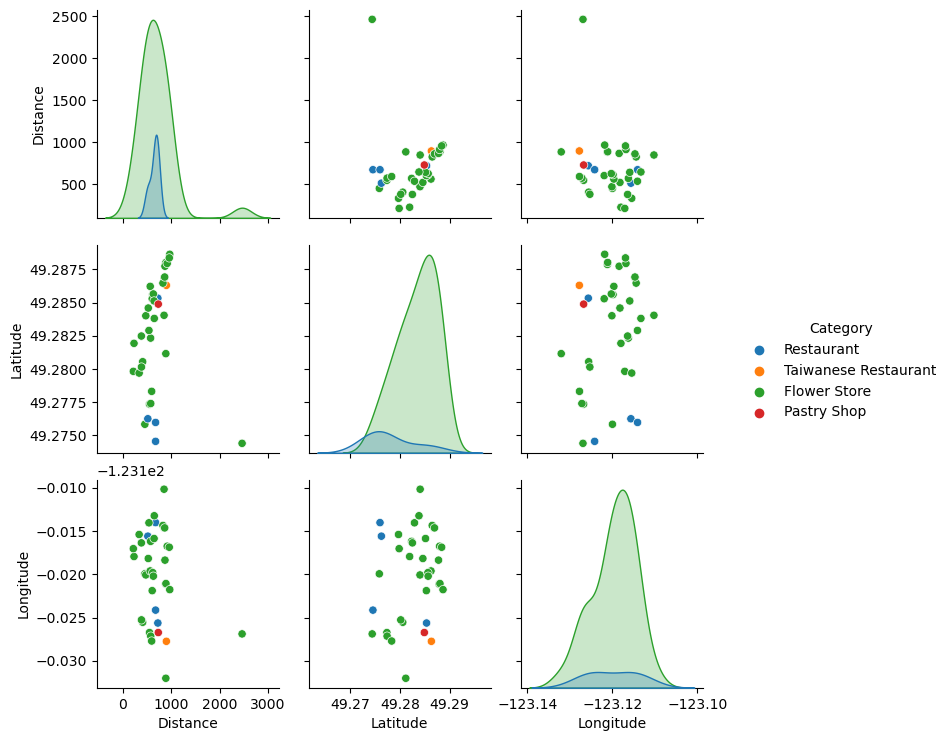

In [15]:
#to see how the different categories of restaurant are scatterred
import seaborn as sns
sns.pairplot(df, hue='Category')


Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

Put your parsed results into a DataFrame

# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [16]:
#imports
import os
import requests
import json
import pandas as pd


In [17]:
#set the parameters for the request: pastry shops, florist
yelp_api_key = os.environ["yelp"]

yelp_url = 'https://api.yelp.com/v3/businesses/search' 

# Headers for the request
yelp_headers = {
    'Authorization': f'Bearer {yelp_api_key}',
    'Accept': 'application/json'
}


# Parameters for the request
yelp_params = {
    'location':'Vancouver, Canada',
    'categories':'pastry shop','florist'
    'radius':'1000'
}
# Send GET request to Yelp API
response = requests.get(yelp_url, params=yelp_params, headers=yelp_headers)

data = response.json()

print(data)

{'businesses': [{'id': '4EV_ZcQmjAmP3pmO-_nb2A', 'alias': 'miku-vancouver-2', 'name': 'Miku', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/7c2vvToR0uWJIQNi4vHgyw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/miku-vancouver-2?adjust_creative=c-Kbdm3ML91ZpNVz4gSjkg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=c-Kbdm3ML91ZpNVz4gSjkg', 'review_count': 2181, 'categories': [{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'sushi', 'title': 'Sushi Bars'}, {'alias': 'vegetarian', 'title': 'Vegetarian'}], 'rating': 4.5, 'coordinates': {'latitude': 49.28691753455261, 'longitude': -123.11276314110472}, 'transactions': [], 'price': '$$$', 'location': {'address1': '200 Granville Street', 'address2': 'Suite 70', 'address3': '', 'city': 'Vancouver', 'zip_code': 'V6C 1S4', 'country': 'CA', 'state': 'BC', 'display_address': ['200 Granville Street', 'Suite 70', 'Vancouver, BC V6C 1S4', 'Canada']}, 'phone': '+16045683900', 'display_phone': '+1 604-568

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [18]:
businesses_list = data['businesses']
# Exclude closed businesses
businesses_list = [business for business in businesses_list if not business['is_closed']]
df = pd.DataFrame(businesses_list)


In [19]:
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,4EV_ZcQmjAmP3pmO-_nb2A,miku-vancouver-2,Miku,https://s3-media3.fl.yelpcdn.com/bphoto/7c2vvT...,False,https://www.yelp.com/biz/miku-vancouver-2?adju...,2181,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 49.28691753455261, 'longitude': -...",[],$$$,"{'address1': '200 Granville Street', 'address2...",+16045683900,+1 604-568-3900,3517.852908
1,crM1idgY_glhtxXT5kERNg,kingyo-vancouver,Kingyo,https://s3-media1.fl.yelpcdn.com/bphoto/A33fW_...,False,https://www.yelp.com/biz/kingyo-vancouver?adju...,1058,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 49.29061, 'longitude': -123.13714}",[],$$,"{'address1': '871 Denman Street', 'address2': ...",+16046081677,+1 604-608-1677,3956.429708
2,LjdbthVdtLYKSi7iVAFl0g,jam-cafe-on-beatty-vancouver,Jam Cafe on Beatty,https://s3-media1.fl.yelpcdn.com/bphoto/urO8_u...,False,https://www.yelp.com/biz/jam-cafe-on-beatty-va...,1351,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.5,"{'latitude': 49.2802586, 'longitude': -123.109...",[],$$,"{'address1': '556 Beatty Street', 'address2': ...",+17783791992,+1 778-379-1992,2873.704195
3,Ufhxnrt_OJu4jHfVTP3aRQ,fanny-bay-oyster-bar-and-shellfish-market-vanc...,Fanny Bay Oyster Bar & Shellfish Market,https://s3-media1.fl.yelpcdn.com/bphoto/1EZFex...,False,https://www.yelp.com/biz/fanny-bay-oyster-bar-...,743,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 49.2787525, 'longitude': -123.113...",[],$$,"{'address1': '762 Cambie St', 'address2': '', ...",+17783799510,+1 778-379-9510,2598.458980
4,_4R46MNkwx9MeOyt0YfNxA,chambar-vancouver,Chambar,https://s3-media4.fl.yelpcdn.com/bphoto/qdh0Uv...,False,https://www.yelp.com/biz/chambar-vancouver?adj...,1529,"[{'alias': 'belgian', 'title': 'Belgian'}]",4.0,"{'latitude': 49.2801460007961, 'longitude': -1...",[],$$$,"{'address1': '568 Beatty Street', 'address2': ...",+16048797119,+1 604-879-7119,2855.663218
5,2cXOMeyBCx4JFgs5-CJQdQ,joe-fortes-seafood-and-chop-house-vancouver,Joe Fortes Seafood & Chop House,https://s3-media2.fl.yelpcdn.com/bphoto/Xvx_wr...,False,https://www.yelp.com/biz/joe-fortes-seafood-an...,1228,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 49.28493, 'longitude': -123.12473}",[],$$$,"{'address1': '777 Thurlow Street', 'address2':...",+16046691940,+1 604-669-1940,3206.827087
6,QmkGDL-8zexdKV3Xcn8ZYg,oeb-breakfast-co-yaletown-vancouver-3,OEB Breakfast Co. Yaletown,https://s3-media1.fl.yelpcdn.com/bphoto/B-MxxZ...,False,https://www.yelp.com/biz/oeb-breakfast-co-yale...,717,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.5,"{'latitude': 49.2734341, 'longitude': -123.119...",[],$$,"{'address1': '1137 Marinaside Crescent', 'addr...",+16044233447,+1 604-423-3447,1956.674111
7,yeNenSjz_HCqngGFU5d8NQ,phnom-penh-vancouver,Phnom Penh,https://s3-media2.fl.yelpcdn.com/bphoto/XzbN2-...,False,https://www.yelp.com/biz/phnom-penh-vancouver?...,1587,"[{'alias': 'cambodian', 'title': 'Cambodian'},...",4.0,"{'latitude': 49.278431, 'longitude': -123.098205}",[],$$,"{'address1': '244 E Georgia Street', 'address2...",+16046825777,+1 604-682-5777,3099.136396
8,p5thThuUITUjAy8gS3sPMw,fable-kitchen-vancouver-2,Fable Kitchen,https://s3-media3.fl.yelpcdn.com/bphoto/38mz3E...,False,https://www.yelp.com/biz/fable-kitchen-vancouv...,764,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.5,"{'latitude': 49.2679331, 'longitude': -123.149...",[],$$,"{'address1': '1944 W 4th Avenue', 'address2': ...",+16047321322,+1 604-732-1322,2254.654257
9,GmEeIcJ9vR04kxzYgPMEgg,guu-with-garlic-vancouver-2,Guu with Garlic,https://s3-media1.fl.yelpcdn.com/bphoto/nmwRtl...,False,https://www.yelp.com/biz/guu-with-garlic-vanco...,1043,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 49.290249, 'longitude': -123.1338...",[],$$,"{'address1': '1698 Robson Street', 'address2':...",+16046858678,+1 

In [20]:
data_new = {'id': [], 'name': [], 'is_closed': [], 'review_count': [],
        'rating': [], 'latitude': [], 'longitude': [], 'address1': [],
        'distance': [], 'location': [], 'categories':[]}

# Extract relevant information
for business in data['businesses']:
    if business['is_closed']:
        continue  # Skip closed businesses

    data_new['id'].append(business['id'])
    data_new['name'].append(business['name'])
    data_new['is_closed'].append(business['is_closed'])
    data_new['review_count'].append(business['review_count'])
    data_new['rating'].append(business['rating'])
    data_new['latitude'].append(business['coordinates']['latitude'])
    data_new['longitude'].append(business['coordinates']['longitude'])
    data_new['address1'].append(business['location']['address1'])
    data_new['distance'].append(business['distance'])
    data_new['categories'].append(business['categories'])
    
    # Combine address components into a single string
    address = ", ".join(filter(None, [business['location']['address1']]))
    data_new['location'].append(address)

# Create DataFrame
df = pd.DataFrame(data_new)

# Drop unnecessary columns
df = df.drop(['address1','is_closed','id'], axis=1)
df = df.rename(columns={'name': 'Name', 'location': 'Location', 'categories': 'Category',
                        'distance': 'Distance', 'rating': 'Rating',
                        'latitude': 'Latitude', 'longitude': 'Longitude'})
df

,Name,review_count,Rating,Latitude,Longitude,Distance,Location,Category
0,Miku,2181,4.5,49.286918,-123.112763,3517.852908,200 Granville Street,"[{'alias': 'japanese', 'title': 'Japanese'}, {..."
1,Kingyo,1058,4.5,49.290610,-123.137140,3956.429708,871 Denman Street,"[{'alias': 'japanese', 'title': 'Japanese'}, {..."
2,Jam Cafe on Beatty,1351,4.5,49.280259,-123.109638,2873.704195,556 Beatty Street,"[{'alias': 'breakfast_brunch', 'title': 'Break..."
3,Fanny Bay Oyster Bar & Shellfish Market,743,4.5,49.278753,-123.113869,2598.458980,762 Cambie St,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a..."
4,Chambar,1529,4.0,49.280146,-123.109925,2855.663218,568 Beatty Street,"[{'alias': 'belgian', 'title': 'Belgian'}]"
5,Joe Fortes Seafood & Chop House,1228,4.0,49.284930,-123.124730,3206.827087,777 Thurlow Street,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a..."
6,OEB Breakfast Co. Yaletown,717,4.5,49.273434,-123.119272,1956.674111,1137 Marinaside Crescent,"[{'alias': 'breakfast_brunch', 'title': 'Break..."
7,Phnom Penh,1587,4.0,49.278431,-123.098205,3099.136396,244 E Georgia Street,"[{'alias': 'cambodian', 'title': 'Cambodian'},..."
8,Fable Kitchen,764,4.5,49.267933,-123.149019,2254.654257,1944 W 4th Avenue,"[{'alias': 'newcanadian', 'title': 'Canadian (..."
9,Guu with Garlic,1043,4.5,49.290249,-123.133814,3860.031994,1698 Robson Street,"[{'alias': 'japanese', 'title': 'Japanese'}, {..."


In [21]:
df['Category'] = df['Category'].apply(lambda x: [item['title'] for item in x])

# Explode the 'Category' column
df = df.explode('Category')

# Reset the index
df.reset_index(drop=True, inplace=True)


In [22]:
df

,Name,review_count,Rating,Latitude,Longitude,Distance,Location,Category
0,Miku,2181,4.5,49.286918,-123.112763,3517.852908,200 Granville Street,Japanese
1,Miku,2181,4.5,49.286918,-123.112763,3517.852908,200 Granville Street,Sushi Bars
2,Miku,2181,4.5,49.286918,-123.112763,3517.852908,200 Granville Street,Vegetarian
3,Kingyo,1058,4.5,49.290610,-123.137140,3956.429708,871 Denman Street,Japanese
4,Kingyo,1058,4.5,49.290610,-123.137140,3956.429708,871 Denman Street,Tapas/Small Plates
5,Jam Cafe on Beatty,1351,4.5,49.280259,-123.109638,2873.704195,556 Beatty Street,Breakfast & Brunch
6,Fanny Bay Oyster Bar & Shellfish Market,743,4.5,49.278753,-123.113869,2598.458980,762 Cambie St,Seafood
7,Fanny Bay Oyster Bar & Shellfish Market,743,4.5,49.278753,-123.113869,2598.458980,762 Cambie St,Seafood Markets
8,Chambar,1529,4.0,49.280146,-123.109925,2855.663218,568 Beatty Street,Belgian
9,Joe Fortes Seafood & Chop House,1228,4.0,49.284930,-123.124730,3206.827087,777 Thurlow Street,Seafood


In [23]:
agg_dict = {
    'review_count': 'first',
    'Rating': 'first',
    'Latitude': 'first',
    'Longitude': 'first',
    'Distance': 'first',
    'Location': 'first',
    'Category': lambda x: ', '.join(x)
}

# Group by "Name" and aggregate the columns
df = df.groupby('Name').agg(agg_dict).reset_index()

In [24]:
df

,Name,review_count,Rating,Latitude,Longitude,Distance,Location,Category
0,Anh and Chi,616,4.0,49.255031,-123.100882,1666.069846,3388 Main Street,"Vietnamese, Cocktail Bars"
1,AnnaLena,346,4.5,49.270826,-123.146771,2337.071856,1809 W 1st Avenue,"Canadian (New), Diners, Bars"
2,Blue Water Cafe,1052,4.5,49.276195,-123.120993,2244.533253,1095 Hamilton St,Seafood
3,Chambar,1529,4.0,49.280146,-123.109925,2855.663218,568 Beatty Street,Belgian
4,Fable Kitchen,764,4.5,49.267933,-123.149019,2254.654257,1944 W 4th Avenue,Canadian (New)
5,Fanny Bay Oyster Bar & Shellfish Market,743,4.5,49.278753,-123.113869,2598.458980,762 Cambie St,"Seafood, Seafood Markets"
6,Forage,697,4.0,49.287070,-123.129250,3459.896465,1300 Robson Street,"Canadian (New), Breakfast & Brunch"
7,Guu with Garlic,1043,4.5,49.290249,-123.133814,3860.031994,1698 Robson Street,"Japanese, Tapas/Small Plates"
8,Jam Cafe on Beatty,1351,4.5,49.280259,-123.109638,2873.704195,556 Beatty Street,Breakfast & Brunch
9,Joe Fortes Seafood & Chop House,1228,4.0,49.284930,-123.124730,3206.827087,777 Thurlow Street,"Seafood, Steakhouses"


In [25]:
yelp_df = df
yelp_df.to_csv("yelp_df.csv", index=False)

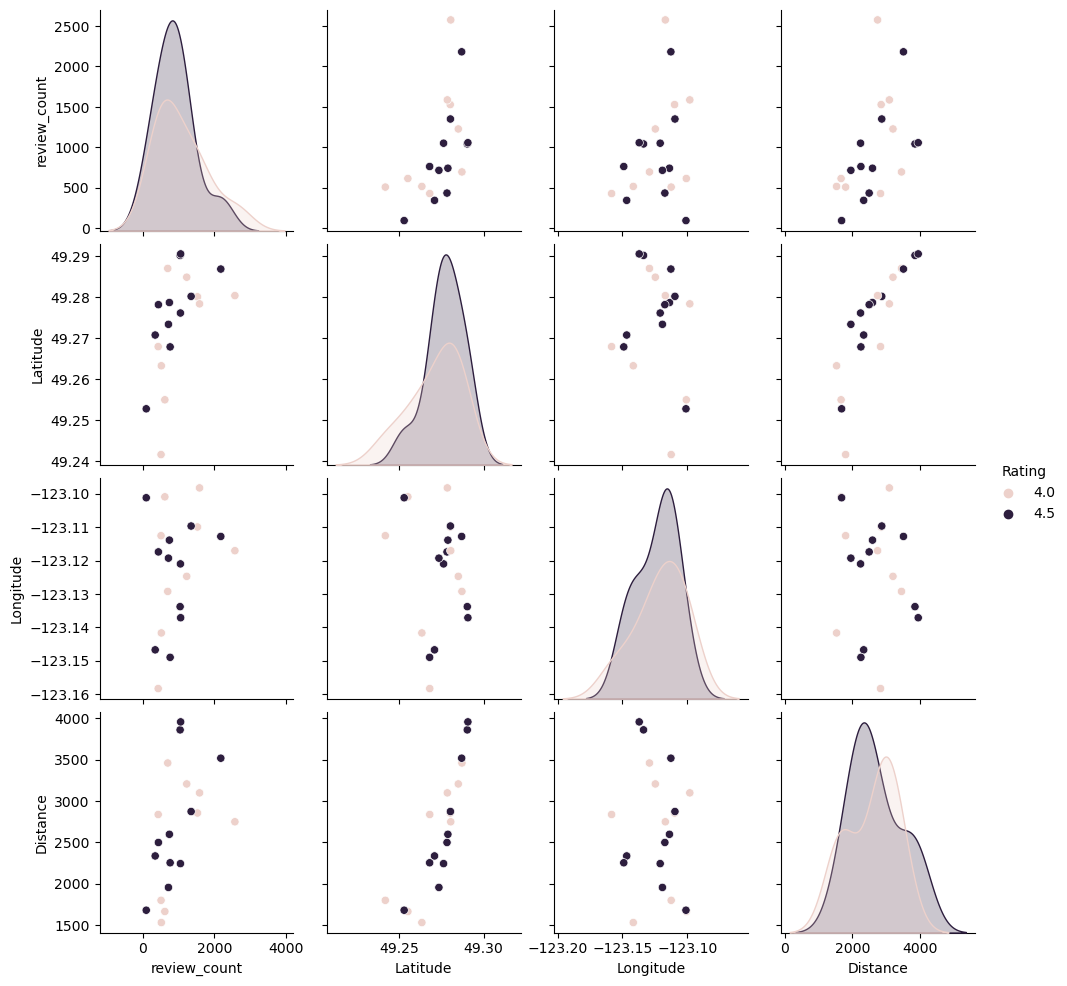

In [26]:
#to see how restaurants with different ratings are scatterred
import seaborn as sns
sns.pairplot(df, hue='Rating')

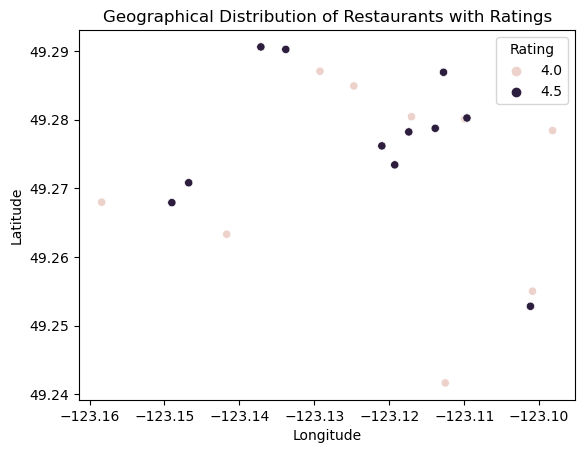

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with color-coded ratings
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Rating')

# Set title and axis labels
plt.title('Geographical Distribution of Restaurants with Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

Put your parsed results into a DataFrame

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

Both API provide the same amount of information in terms of number of rows of data. However Yelp API provides a broader and more detailed range of information, and the columns within the dataset are divided or split, allowing for a more specific analysis or understanding of the data. It has also a rating column which is missing from the Foursquare API. The rating is an important factor because the higher the rating for a restaurant, the more customers it attracts. By taking into account restaurant ratings when analyzing the number of bike stations in the surrounding area, we can gain insights into the neighborhood's liveliness, popularity, convenience, and potential demand for cycling infrastructure.

Get the top 10 restaurants according to their rating

In [93]:
top_ten_restaurants = df.nlargest(10, 'Rating')
top_ten_restaurants

,Name,review_count,Rating,Latitude,Longitude,Distance,Location,Category
1,AnnaLena,346,4.5,49.270826,-123.146771,2337.071856,1809 W 1st Avenue,"Canadian (New), Diners, Bars"
2,Blue Water Cafe,1051,4.5,49.276195,-123.120993,2244.533253,1095 Hamilton St,Seafood
5,Fable Kitchen,764,4.5,49.267933,-123.149019,2254.654257,1944 W 4th Avenue,Canadian (New)
6,Fanny Bay Oyster Bar & Shellfish Market,743,4.5,49.278753,-123.113869,2598.458980,762 Cambie St,"Seafood, Seafood Markets"
7,Guu with Garlic,1043,4.5,49.290249,-123.133814,3860.031994,1698 Robson Street,"Japanese, Tapas/Small Plates"
8,Jam Cafe on Beatty,1351,4.5,49.280259,-123.109638,2873.704195,556 Beatty Street,Breakfast & Brunch
10,Kingyo,1058,4.5,49.290610,-123.137140,3956.429708,871 Denman Street,"Japanese, Tapas/Small Plates"
11,Lupo,436,4.5,49.278230,-123.117400,2499.669741,869 Hamilton Street,Italian
13,Miku,2181,4.5,49.286918,-123.112763,3517.852908,200 Granville Street,"Japanese, Sushi Bars, Vegetarian"
14,OEB Breakfast Co. Yaletown,717,4.5,49.273434,-123.119272,1956.674111,1137 Marinaside Crescent,Breakfast & Brunch
